<style>div.container { width: 100% }</style>
<img style="float:left;  vertical-align:text-bottom;" height="65" width="172" src="../assets/holoviz-logo-unstacked.svg" />
<div style="float:right; vertical-align:text-bottom;"><h2>Tutorial 4. Basic Plotting</h2></div>

Previous sections have focused on putting various simple types of data together in notebooks and deployed servers, but most people will want to include plots as well. In this section, we'll focus on one of the simplest (but still powerful) ways to get a plot.

If you have tried to visualize a `pandas.DataFrame` before, then you have likely encountered the [Pandas .plot() API](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). This basic plotting interface uses [Matplotlib](http://matplotlib.org) to render static PNGs or SVGs in a Jupyter notebook using the`inline` backend (or interactive figures via `%matplotlib notebook` or `%matplotlib widget`) and for exporting from Python, with a command that can be as simple as `df.plot()` for a DataFrame with one or two columns. 

The Pandas .plot() API has emerged as a de-facto standard for high-level plotting APIs in Python, and is now supported by many different libraries that use other underlying plotting engines to provide additional power and flexibility. Thus learning this API allows you to access capabilities provided by a wide variety of underlying tools, with relatively little additional effort. The libraries currently supporting this API include:

- [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) -- Matplotlib-based API included with Pandas. Static or interactive output in Jupyter notebooks.
- [xarray](https://xarray.pydata.org/en/stable/plotting.html) -- Matplotlib-based API included with xarray, based on pandas .plot API. Static or interactive output in Jupyter notebooks.
- [hvPlot](https://hvplot.pyviz.org) -- HoloViews and Bokeh-based interactive plots for Pandas, GeoPandas, xarray, Dask, Intake, and Streamz data.
- [Pandas Bokeh](https://github.com/PatrikHlobil/Pandas-Bokeh) -- Bokeh-based interactive plots, for Pandas, GeoPandas, and PySpark data.
- [Cufflinks](https://github.com/santosjorge/cufflinks) -- Plotly-based interactive plots for Pandas data.
- [Plotly Express](https://plotly.com/python/pandas-backend) -- Plotly-Express-based interactive plots for Pandas data; only partial support for the .plot API keywords
- [PdVega](https://altair-viz.github.io/pdvega) -- Vega-lite-based, JSON-encoded interactive plots for Pandas data.

In this notebook we'll explore what is possible with the default `.plot` API and demonstrate the additional capabilities of `.hvplot`, using the same dataset. Of course, this particular dataset is just an example; the same approach can be used with just about any tabular dataset.

### Read in the data

In [1]:
from load_data import *

df = load_data()
print(df.shape)
df.head()

(764431, 7)


,station,latitude,longitude,time,wvht,wspd,gst
0,41001,34.675,-72.698,2021-01-01T00:40:00Z,2.14,10.0,12.8
1,41001,34.675,-72.698,2021-01-01T01:40:00Z,2.23,10.6,12.9
2,41001,34.675,-72.698,2021-01-01T02:40:00Z,2.07,10.6,13.3
3,41001,34.675,-72.698,2021-01-01T03:40:00Z,1.97,9.2,11.6
4,41001,34.675,-72.698,2021-01-01T04:40:00Z,1.94,9.2,11.3


In [2]:
lat_min = df.latitude.min()
lat_max = df.latitude.max()

lon_min = df.longitude.min()
lon_max = df.longitude.max()

f"Wave heights from {lat_min, lat_max} latitude to {lon_min, lon_max} longitude"

'Wave heights from (-14.265, 60.794) latitude to (-172.167, 179.001) longitude'

### Using Pandas `.plot`

The first thing that we'd like to do with this data is visualize the locations of every earthquake. So we would like to make a scatter or points plot where `x='longitude'` and `y='latitude'`. 

If you are familiar with the `pandas.plot` API, you might expect to execute `df.plot.scatter(x='longitude', y='latitude')`. Feel free to try this out in a new cell, but it will throw an error: `AttributeError: 'DataFrame' object has no attribute 'plot'`. In order to make the data more manageable for now, we'll briefly use just a fraction (1%) of it and call that `small_df`. 

In [16]:
%matplotlib inline
small_df = df.sample(frac=.1)
small_df.shape

(76443, 7)

Now we have a smaller dataset with many fewer observations. We can use that to test out our visualizations before ramping back up to the full dataset.

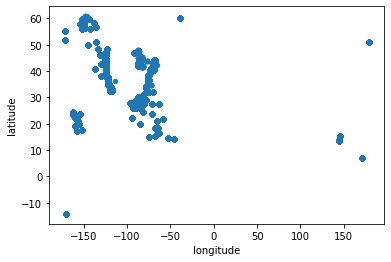

In [17]:
small_df.plot.scatter(x='longitude', y='latitude');

### Using `.hvplot`

As you can see above, the Pandas API gives you a usable plot very easily, where you can start to see the density of waves in the western hemisphere. You can make a very similar plot with the same arguments using hvplot. 

In [18]:
import hvplot.pandas

In [33]:
small_df.hvplot.scatter(x='longitude', y='latitude', alpha=0.1)

:Scatter   [longitude]   (latitude)

Here unlike in the Pandas `.plot()` there is a default hover action on the datapoints to show the location values, and you can also pan and zoom to focus on any particular region of the data of interest.

You might have noticed that many of the dots in the scatter that we've just created lie on top of one another. This is called ["overplotting"](http://datashader.org/user_guide/1_Plotting_Pitfalls.html#1.-Overplotting) and can be avoided in a variety of ways, such as by making the dots slightly transparent, or binning the data. These approaches have the downside of introducing bias because you need to choose the alpha or the edges of the bins, and in order to do that, you have to make assumptions about the data. For an initial exploration of a new dataset, it's much safer if you can just ***see*** the data, before you impose any assumptions about its form or structure. 


#### Exercise

Try changing the alpha (try .1) on the plot above to see the effect of this approach

Try creating a `hexbin` plot.

In [34]:
small_df.hvplot.hexbin(x='longitude', y='latitude', alpha=0.8)

:HexTiles   [longitude,latitude]

### Datashader

To avoid some of the problems of traditional scatter/point plots we can use [Datashader](datashader.org), which aggregates data into each pixel without any arbitrary parameter settings. In `hvplot` we can activate this capability by setting `datashade=True`.

In [35]:
small_df.hvplot.scatter(x='longitude', y='latitude', datashade=True, dynspread=True)

:DynamicMap   []
   :RGB   [longitude,latitude]   (R,G,B,A)

Here you can see all of the rich detail in this set of thousands of wave heights. If you have a live Python process running, you can zoom in and see additional detail at each zoom level, without tuning any parameters or making any assumptions about the form or structure of the data. We'll come back to Datashader later, but for now the important thing to know about it is that it lets us work with arbitrarily large datasets in a web browser conveniently.

Note that the `.hvplot()` API works here because unlike the other `.plot` libraries, `hvplot` doesn't just target Pandas objects. Instead hvplot can be used with: 
 - Pandas : DataFrame, Series (columnar/tabular data)
 - xarray : Dataset, DataArray (labelled multidimensional arrays)
 - Dask : DataFrame, Series (distributed/out of core arrays and columnar data)
 - Streamz : DataFrame(s), Series(s) (streaming columnar data)
 - Intake : DataSource (data catalogues)
 - GeoPandas : GeoDataFrame (geometry data)
 - NetworkX : Graph (network graphs)

#### Exercise


Select a subset of the data, e.g. only magitudes >5 and plot them with a different colormap (valid `cmap` values include 'viridis', 'Reds' and 'magma'):

<details><summary>Solution</summary><br>

```python
df[df.mag>5].hvplot.scatter(x='longitude', y='latitude', datashade=True, cmap='Reds')
```
    
</details>

### A Note on `points`

As a final note, we should really use `hvplot.points` instead of `hvplot.scatter` in this instance. The former does not exist in the standard pandas `.plot` API which is why we have used `hvplot.scatter` up until now.

The reason scatter is inappropriate is that it implies that the y-axis (latitude) is a *dependent variable* with respect to the x-axis (latitude). In reality, this is not the case, as waves can happen anywhere on the Earth's two-dimensional surface. For this reason, it is best to use `hvplot.points` for wave locations, as will be explained further in the next notebook.

In [36]:
small_df.hvplot.points(x='longitude', y='latitude', datashade=True)

:DynamicMap   []
   :RGB   [longitude,latitude]   (R,G,B,A)

### Statistical Plots

Let's dive into some of the other capabilities of `.plot()` and `.hvplot()`, starting with the frequency of different wind gusts.

As a first pass, we'll use a histogram first with `plot.hist` on the small data, then with `.hvplot.hist` on the full dataset.

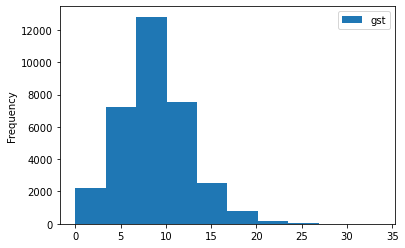

In [43]:
small_df.plot.hist(y='gst');

Similarly we can create a histogram of the whole dataset using hvplot:

In [44]:
df.hvplot.hist(y='gst', bin_range=(0, 10), bins=50)

:Histogram   [gst]   (gst_count)

#### Exercise

Create a kernel density estimate (kde) plot of wind gust speed using the smaller `small_df`:

### Categorical variables

Next we'll categorize the waves based on wind gusts. You can read about all the different variables available in this dataset [here](https://coastwatch.pfeg.noaa.gov/erddap/info/cwwcNDBCMet/index.html).

First we'll use `pd.cut` to split the small_dataset into gust categories.

In [40]:
import numpy as np
import pandas as pd

In [53]:
gust_bins = [-np.inf, 4, 8, np.inf]
gust_names = ['Tame', 'Gusty', 'Blown Away']
gust_class_column = pd.cut(small_df['gst'], gust_bins, labels=gust_names)

small_df.insert(1, 'gust_class', gust_class_column)
# handy: in case we need to modify the "gust_class", we can drop it from our data frame in order to re-add it
# small_df = small_df.drop(['gust_class'], axis=1)

We can now use this new categorical variable to group our data. First we will overlay all our groups on the same plot using the `by` option:

In [54]:
small_df.hvplot.hist(y='wvht', by='gust_class', alpha=0.6)

:NdOverlay   [gust_class]
   :Histogram   [wvht]   (wvht_count)

**NOTE:** Click on the legend to turn off certain categories and see what is behind them.

#### Exercise

Add `subplots=True` and `width=300` to see the different classes side-by-side. The y-axis will be linked, so try zooming.

### Grouping
To use a widget to toggle between classes, use the `groupby` option, here in a bivariate plot:

In [50]:
small_df.hvplot.bivariate(x='wvht', y='gst', groupby='gust_class')

:DynamicMap   [gust_class]
   :Bivariate   [wvht,gst]   (Density)

# Exploring further

These visualizations just touch the surface of what is available from hvPlot. To see many more examples, study the [hvPlot website](https://hvplot.pyviz.org). The following section will focus on how to put these plots together once you have them, linking them to understand and show their relationships.